<a href="https://colab.research.google.com/github/LintangAprillya/PCVK_Ganjil_2024/blob/main/Quiz%202%20-%20Klasifikasi%20Sampah%20dengan%20Metode%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KUIS 2 - PCVK**
----
## Judul: Klasifikasi Sampah dengan Metode CNN (Convolutional Neural Network)
----
### Nama  : Lintang Aprillya Sari
### Kelas : TI - 3C   
### NIM   : 2241720231
### No    : 13


# Preparation Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from tensorflow.keras.models import Sequential

import glob, os, random, zipfile


In [8]:
# Ekstraksi file ZIP
dataset_path = 'dataset'
zip_file = zipfile.ZipFile('garbage-classification.zip')
zip_file.extractall(dataset_path)
zip_file.close()

In [13]:
base_path = os.path.join(dataset_path, 'garbage classification/Garbage classification')

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(f"Jumlah total gambar pada dataset : {len(img_list)}" f" gambar")

Jumlah total gambar pada dataset : 2527 gambar


# Training

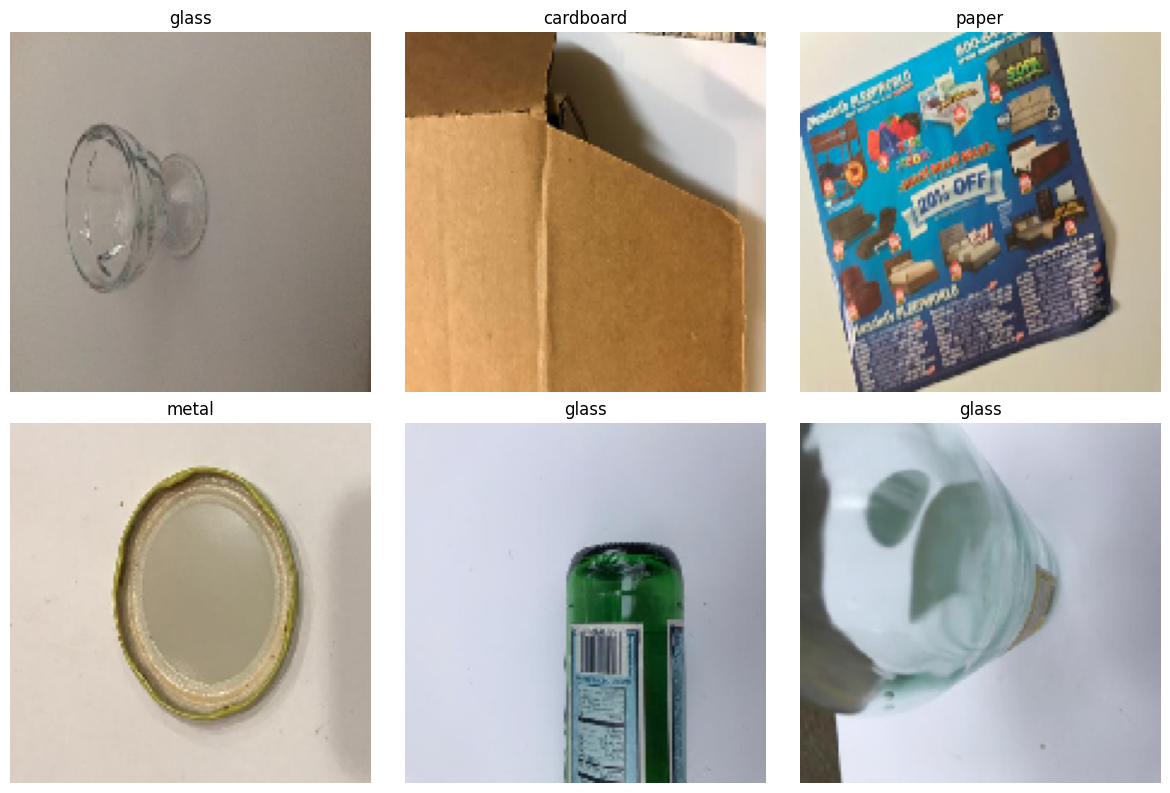

In [20]:
# Menampilkan 6 gambar acak dari dataset
plt.figure(figsize=(12, 8))

for i, img_path in enumerate(random.sample(img_list, 6)):
    # Mengambil nama kelas dari path
    label = os.path.basename(os.path.dirname(img_path))

    # Memuat dan mengubah gambar menjadi array
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img, dtype=np.uint8)

    # Menampilkan gambar
    plt.subplot(2, 3, i + 1)
    plt.imshow(img_array.astype('uint8'))
    plt.axis('off')
    plt.title(label)  # Menampilkan label sebagai judul gambar

plt.tight_layout()
plt.show()

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1  # Split 10% data untuk validasi
)

# Generator data untuk training
train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

# Generator data untuk validasi
validation_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

# Menampilkan label kelas
labels = (train_generator.class_indices)
labels = dict((v, k) for k, v in labels.items())
print("Label kelas:", labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
Label kelas: {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [22]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

# Kompilasi model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 150, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 75, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 37, 37, 32)        0

# Train Model CNN untuk Training dan Validasi

In [24]:
model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
143/143 [==============================] - 281s 2s/step - loss: 1.4233 - acc: 0.4055 - val_loss: 1.4020 - val_acc: 0.3865
Epoch 2/30
143/143 [==============================] - 279s 2s/step - loss: 1.3369 - acc: 0.4662 - val_loss: 1.4293 - val_acc: 0.4104
Epoch 3/30
143/143 [==============================] - 279s 2s/step - loss: 1.2553 - acc: 0.5136 - val_loss: 1.3103 - val_acc: 0.4940
Epoch 4/30
143/143 [==============================] - 278s 2s/step - loss: 1.1693 - acc: 0.5496 - val_loss: 1.2186 - val_acc: 0.5339
Epoch 5/30
143/143 [==============================] - 278s 2s/step - loss: 1.1055 - acc: 0.5804 - val_loss: 1.3272 - val_acc: 0.4821
Epoch 6/30
143/143 [==============================] - 278s 2s/step - loss: 1.0749 - acc: 0.5879 - val_loss: 1.2936 - val_acc: 0.5259
Epoch 7/30
143/143 [==============================] - 279s 2s/step - loss: 1.0402 - acc: 0.6142 - val_loss: 1.1377 - val_acc: 0.5458
Epoch 8/30
143/143 [==============================] - 278s 2s/step - 

In [25]:
#define tes generator

test_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',  # Atau gunakan data uji jika tersedia
    seed=0
)


Found 251 images belonging to 6 classes.


1/1 [==============================] - 0s 499ms/step


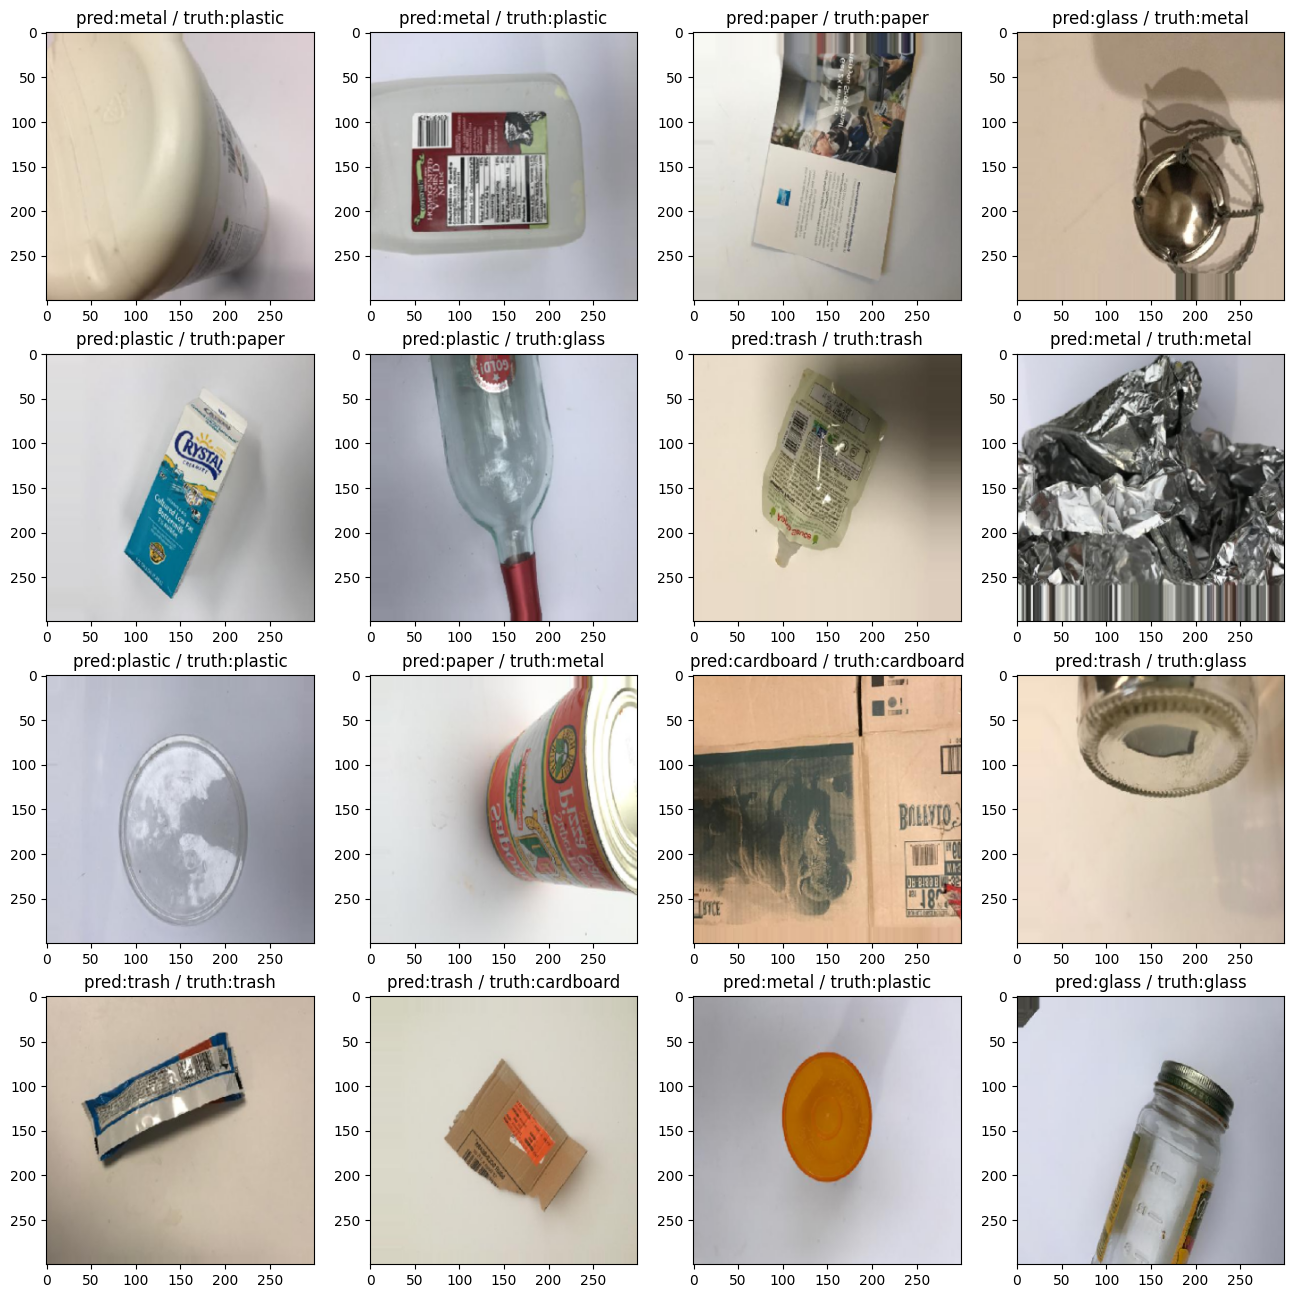

In [26]:
#ngambil batch data dari generator validasi / test
test_x, test_y = test_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
  plt.imshow(test_x[i])

# Testing

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# evaluasi model (test data)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

16/16 [==============================] - 10s 627ms/step - loss: 0.8914 - acc: 0.6653
Test Loss: 0.8914, Test Accuracy: 0.6653


In [28]:
# save model (bisa dipakai lagi nanti -> biar tidak usah ngetrain lagi)

model.save('garbage_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 10s 613ms/step


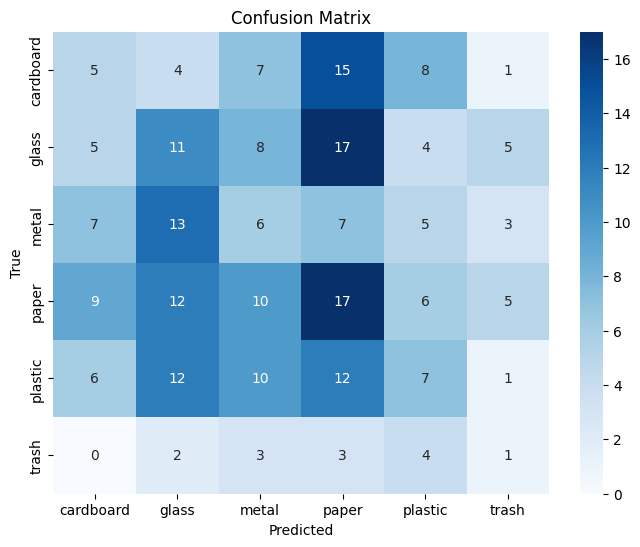

              precision    recall  f1-score   support

   cardboard       0.16      0.12      0.14        40
       glass       0.20      0.22      0.21        50
       metal       0.14      0.15      0.14        41
       paper       0.24      0.29      0.26        59
     plastic       0.21      0.15      0.17        48
       trash       0.06      0.08      0.07        13

    accuracy                           0.19       251
   macro avg       0.17      0.17      0.17       251
weighted avg       0.19      0.19      0.19       251



In [30]:
# Prediksi seluruh data uji
test_preds = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1, verbose=1)
test_preds = np.argmax(test_preds, axis=1)

# Mendapatkan label sebenarnya
test_labels = test_generator.labels

# Confusion matrix
cm = confusion_matrix(test_labels, test_preds)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels.values(), yticklabels=labels.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report untuk metrik tambahan
print(classification_report(test_labels, test_preds, target_names=labels.values()))